In [3]:
import requests
import pandas as pd
import random

In [4]:
def populate_city():
    dataFrame = pd.read_csv("cities_list1.csv")
    
    num_rows = dataFrame.shape[0]
    column_names = ['country', 'name']
    random_cells = {}
    for column in range(200):
        row = random.randint(0, num_rows - 1)
        key = dataFrame.at[row, column_names[0]]
        value = dataFrame.at[row, column_names[1]]
        random_cells[key] = value
    return random_cells


def get_weather(api_key, city):
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        'q': city,
        'appid': api_key,
        'units' : 'metric'
    }

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()
        print
        temperature = data['main']['temp']
        description = data['weather'][0]['description']
        country = data['sys']['country']
        wind_speed = data['wind']['speed']
        wind_direction = data['wind']['deg']
        return country, city, temperature, wind_speed, wind_direction, description
    except requests.exceptions.RequestException as e:
        return f"Error connecting to OpenWeatherMap API: {e}"

    
api_key = "0f742097a737c47ecf2da205e62a0853"


cities = {}
if not cities:
    cities = populate_city()

column_names = ["Country", "City", "Temp(°C)","Wind Speed", "Wind Direction(°)", "Description"]
weather_data = []
for city in cities:
    data = get_weather(api_key, cities[city])
    if 'Error connecting to OpenWeatherMap API' in data:
        continue
    weather_data.append(data)

df = pd.DataFrame(weather_data, columns = column_names)

df.to_csv('weather_data.csv')
data = pd.read_csv('weather_data.csv')
print(data)

    Unnamed: 0 Country         City  Temp(°C)  Wind Speed  Wind Direction(°)  \
0            0      AS    Pago Pago     31.55        3.09                  0   
1            1      LY      Tripoli     12.70        1.84                156   
2            2      ZA       Soweto     17.31        0.00                  0   
3            3      ET  Addis Ababa     15.49        5.66                 50   
4            4      AR      Cordoba     32.09        4.12                 40   
..         ...     ...          ...       ...         ...                ...   
93          93      DM       Roseau     26.01        2.62                 85   
94          94      AW   Oranjestad     27.73        9.26                 80   
95          95      KM       Moroni     26.21        1.24                177   
96          96      BD        Dhaka     18.99        0.00                  0   
97          97      UZ     Tashkent      0.97        5.14                200   

         Description  
0      broken cl

In [5]:
print(data.shape)
# data = data.iloc[1:]
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head(25)

(98, 7)


,Country,City,Temp(°C),Wind Speed,Wind Direction(°),Description
0,AS,Pago Pago,31.55,3.09,0,broken clouds
1,LY,Tripoli,12.70,1.84,156,clear sky
2,ZA,Soweto,17.31,0.00,0,broken clouds
3,ET,Addis Ababa,15.49,5.66,50,scattered clouds
4,AR,Cordoba,32.09,4.12,40,few clouds
5,GN,Conakry,28.04,3.09,290,mist
6,SK,Bratislava,2.21,1.54,140,few clouds
7,IR,Tehran,5.67,3.09,150,broken clouds
8,AL,Tirana,-0.51,2.06,210,clear sky
9,TV,Funafuti,26.00,7.20,300,overcast clouds


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            98 non-null     object 
 1   City               98 non-null     object 
 2   Temp(°C)           98 non-null     float64
 3   Wind Speed         98 non-null     float64
 4   Wind Direction(°)  98 non-null     int64  
 5   Description        98 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.7+ KB


In [7]:
data['Country'].unique()

array(['AS', 'LY', 'ZA', 'ET', 'AR', 'GN', 'SK', 'IR', 'AL', 'TV', 'MX',
       'ES', 'MZ', 'BR', 'VG', 'MP', 'TN', 'PF', 'CI', 'MK', 'KN', 'GA',
       'UY', 'SB', 'IN', 'JO', 'TR', 'US', 'BY', 'GH', 'VE', 'XK', 'MY',
       'FI', 'MG', 'AU', 'EC', 'SA', 'JP', 'PK', 'SY', 'KR', 'MA', 'RE',
       'CN', 'MH', 'IL', 'NG', 'JE', 'MC', 'NZ', 'EE', 'ST', 'GR', 'SS',
       'ZW', 'CA', 'PT', 'DJ', 'IQ', 'RU', 'PH', 'KH', 'VI', 'GG', 'SZ',
       'FJ', 'BZ', 'CO', 'BE', 'SE', 'HN', 'LT', 'RS', 'CY', 'NO', 'MF',
       'CM', 'MM', 'TW', 'BG', 'SD', 'BH', 'GF', 'SI', 'NL', 'JM', 'GT',
       'AT', 'LS', 'GM', 'KZ', 'DM', 'AW', 'KM', 'BD', 'UZ'], dtype=object)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

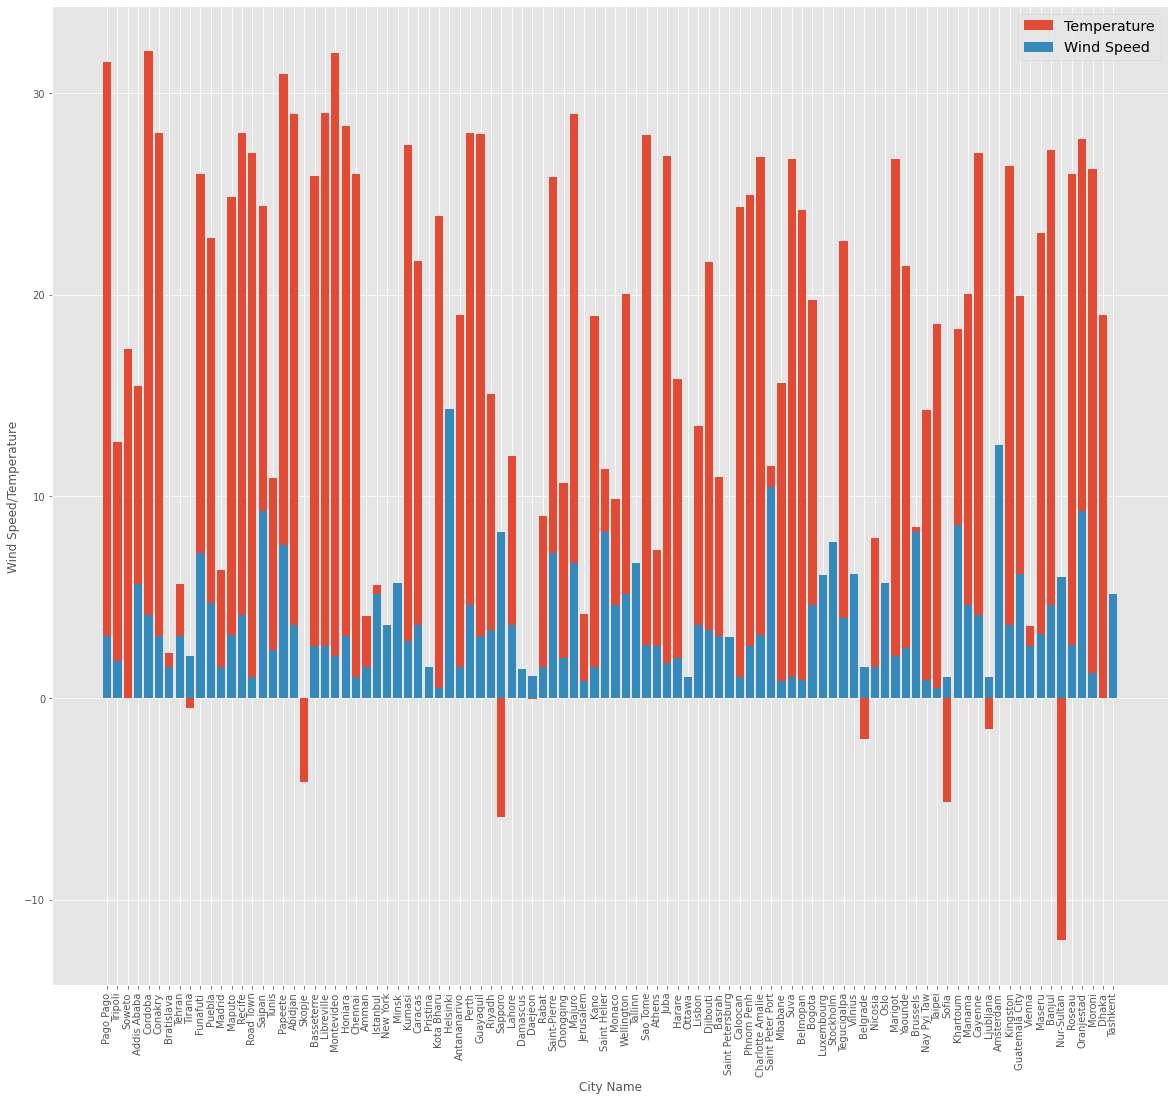

In [60]:
#Data Distribution
import matplotlib.pyplot as plt

plt.style.use("ggplot")

fig, axs = plt.subplots(1, 1, figsize=(20, 18))

plt.bar(data['City'], data['Temp(°C)'], align = 'center')
plt.xlabel('City Name')
# plt.ylabel("Temperature")

plt.bar(data['City'], data['Wind Speed'], align = 'center')
plt.xlabel('City Name')
plt.ylabel("Wind Speed/Temperature")

plt.legend(["Temperature", "Wind Speed"], frameon=True, fontsize= 'x-large')

plt.xticks(rotation=90)
# plt.grid()

# axs[0, 1].plt.bar

In [8]:
missing = data.isna().sum().sort_values(ascending=False)
print(missing)

Country              0
City                 0
Temp(°C)             0
Wind Speed           0
Wind Direction(°)    0
Description          0
dtype: int64


In [9]:
data.describe()

,Temp(°C),Wind Speed,Wind Direction(°)
count,98.000000,98.000000,98.000000
mean,15.561224,3.688163,162.377551
std,11.217660,2.772612,105.588827
min,-12.030000,0.000000,0.000000
25%,4.892500,1.540000,77.000000
50%,18.410000,3.090000,173.500000
75%,26.007500,5.027500,248.500000
max,32.090000,14.310000,360.000000


In [79]:
sorted_temp = data.sort_values(by=['Temp(°C)'], ascending=False).reset_index(drop=True).head(10)

sorted_windSpeed = data.sort_values(by=['Wind Speed'], ascending=False).reset_index(drop=True).head(10)

sorted_temp1 = data.sort_values(by=['Temp(°C)'], ascending=True).reset_index(drop=True).head(10)

sorted_windSpeed1 = data.sort_values(by=['Wind Speed'], ascending=True).reset_index(drop=True).head(10)

print(sorted_temp.describe())
print(sorted_windSpeed.describe())

sorted_temp.head()

        Temp(°C)  Wind Speed  Wind Direction(°)
count  10.000000   10.000000          10.000000
mean   29.800000    4.003000         160.000000
std     1.661485    1.785049          99.107125
min    28.020000    2.060000           0.000000
25%    28.515000    3.090000          80.000000
50%    28.995000    3.345000         180.000000
75%    31.402500    4.120000         227.500000
max    32.090000    7.600000         290.000000
        Temp(°C)  Wind Speed  Wind Direction(°)
count  10.000000   10.000000          10.000000
mean   10.940000    9.683000         221.600000
std    10.294254    2.155933          84.226151
min    -5.920000    7.720000          80.000000
25%     4.867500    8.230000         215.500000
50%     9.925000    8.925000         241.000000
75%    16.592500   10.175000         254.500000
max    27.730000   14.310000         354.000000


,Country,City,Temp(°C),Wind Speed,Wind Direction(°),Description
0,AR,Cordoba,32.09,4.12,40,few clouds
1,UY,Montevideo,32.01,2.06,150,few clouds
2,AS,Pago Pago,31.55,3.09,0,broken clouds
3,PF,Papeete,30.96,7.60,230,scattered clouds
4,GA,Libreville,29.01,2.57,220,light rain


In [16]:
sorted_windSpeed.head()

,Country,City,Temp(°C),Wind Speed,Wind Direction(°),Description
0,FI,Helsinki,1.61,14.31,214,broken clouds
1,NL,Amsterdam,8.19,12.52,242,light rain
2,GG,Saint Peter Port,11.50,10.48,256,overcast clouds
3,MP,Saipan,24.39,9.26,80,scattered clouds
4,AW,Oranjestad,27.73,9.26,80,few clouds


In [26]:
temperatures = sorted_temp['Temp(°C)'].tolist()
cities = sorted_temp['City'].tolist()
wind_speed = sorted_temp['Wind Speed']
print(temperatures)
print(cities)

[32.09, 32.01, 31.55, 30.96, 29.01, 28.98, 28.98, 28.36, 28.04, 28.02]
['Cordoba', 'Montevideo', 'Pago Pago', 'Papeete', 'Libreville', 'Majuro', 'Abidjan', 'Honiara', 'Conakry', 'Recife']


<function matplotlib.pyplot.show(close=None, block=None)>

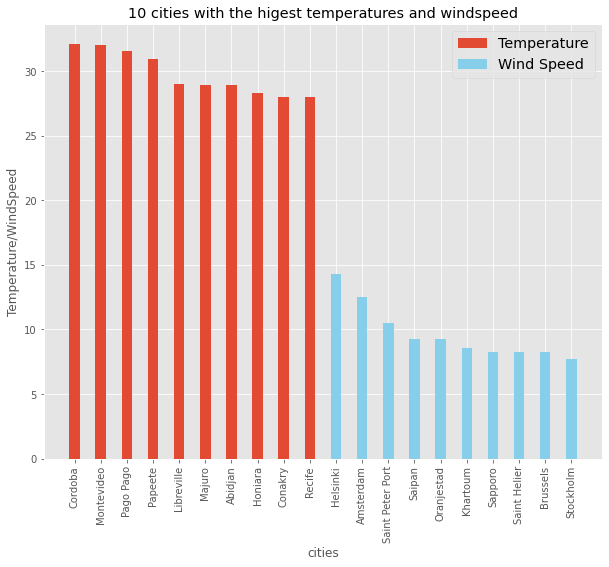

In [81]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# fig, ax = plt.subplots(figsize=(10, 6))

# ax.bar()

plt.figure(figsize=(10, 8))

plt.bar(sorted_temp["City"], sorted_temp["Temp(°C)"], align = "center",width=0.4)
plt.xlabel("cities")
plt.xticks(rotation=90)
plt.ylabel("Temperature")
plt.title("10 Hottest Cities")
# plt.show()

plt.bar(sorted_windSpeed['City'], sorted_windSpeed["Wind Speed"], align= "center", width=0.4, color="skyblue")
plt.xticks(rotation=90)
plt.xlabel('cities')
plt.ylabel('Temperature/WindSpeed')
plt.title('10 cities with the higest temperatures and windspeed')
plt.legend(['Temperature', 'Wind Speed'], fontsize = 'x-large')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

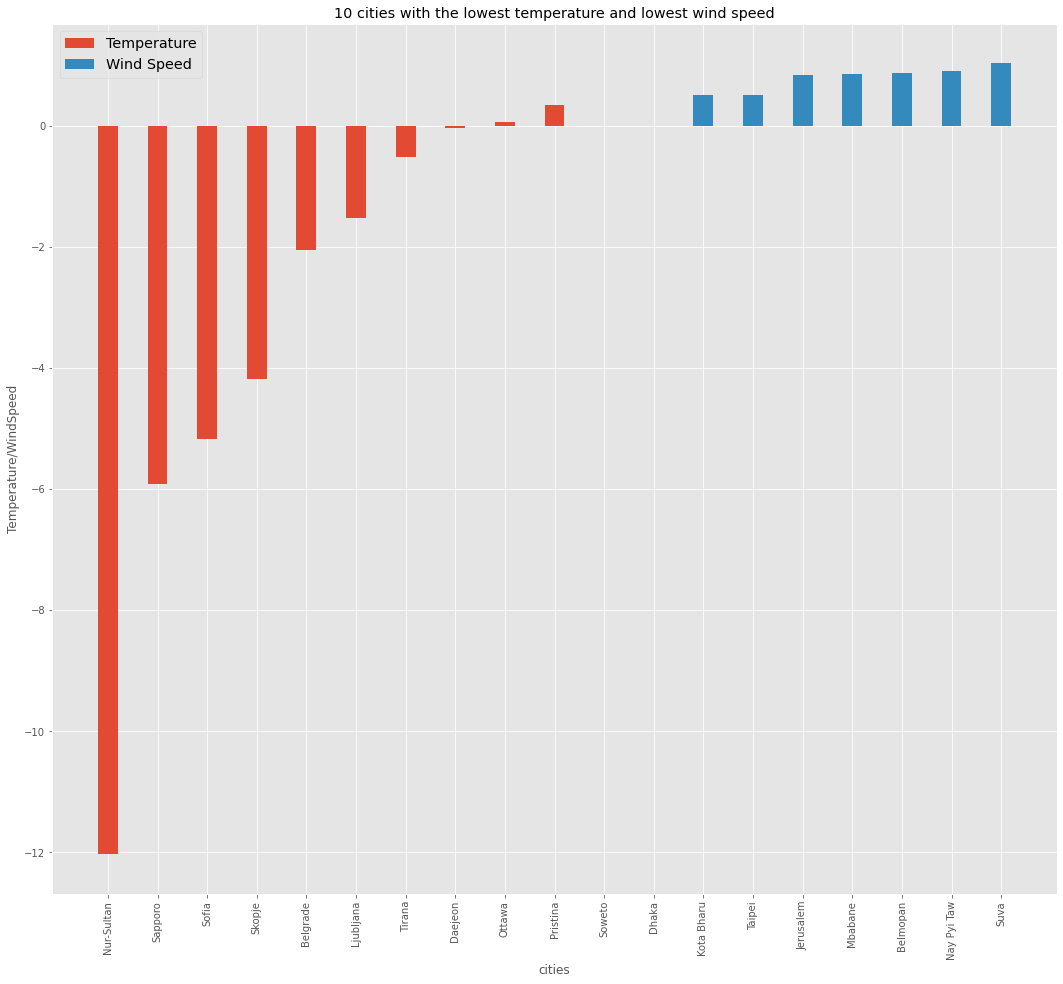

In [68]:
plt.style.use('ggplot')

# fig, ax = plt.subplots(figsize=(10, 6))

# ax.bar()

plt.figure(figsize=(18, 16))

plt.bar(sorted_temp1["City"], sorted_temp1["Temp(°C)"], align = "center",width=0.4)
plt.xlabel("cities")
plt.ylabel("Temperature")
plt.title("10 Hottest Cities")

plt.bar(sorted_windSpeed1['City'], sorted_windSpeed1["Wind Speed"], align= "center",width=0.4)
plt.xticks(rotation=90)
plt.xlabel('cities')
plt.ylabel('Temperature/WindSpeed')
plt.title('10 cities with the lowest temperature and lowest wind speed')
plt.legend(['Temperature', 'Wind Speed'], fontsize = 'x-large')
plt.grid(True)
plt.show

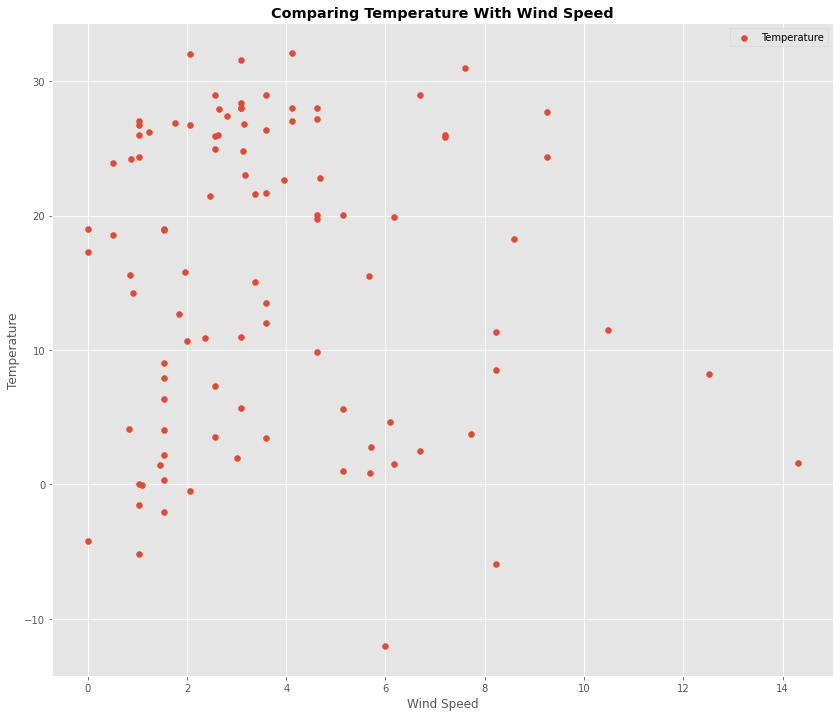

In [95]:
# Comparing the temperature with wind speed
import numpy as np


fig, ax = plt.subplots(figsize=(14, 12))

ax.scatter(data['Wind Speed'], data['Temp(°C)'])
# Add a title and labels for x and y axes
ax.set_xlabel("Wind Speed")
ax.set_ylabel("Temperature")
ax.set_title("Comparing Temperature With Wind Speed", fontweight="bold")
z = np.polyfit(data['Wind Speed'], data['Temp(°C)'], 1)
p  = np.poly1d(z)
# plt.plot(data['Temp (°C)'], p(data['Temp (°C)']), color='black')

plt.legend(["Temperature", "Wind Speed"])

plt.show()